In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set styles
plt.style.use('ggplot')
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20
%matplotlib inline

In [2]:
# Create a range for years 2000 to 2017
years = range(2000, 2018)

# Column names of data frame
columns = ['name', 'sex', 'births']

# List of frame objects to append to
frames = []

In [3]:
# Loop through each year and create an array of panda data set
for year in years:
    '''Get each file and append it to the frames array to be concatenated'''
    path = 'baby-names/yob%d.txt' % year
    data = pd.read_csv(path, names=columns)
    data['year'] = year
    frames.append(data)

# Glue the frame objects together row-wise by default
df_baby = pd.concat(frames, ignore_index=True)

In [4]:
df_baby.head()

,name,sex,births,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [5]:
total_births = df_baby.pivot_table('births', index='year', columns='sex', aggfunc=np.sum)

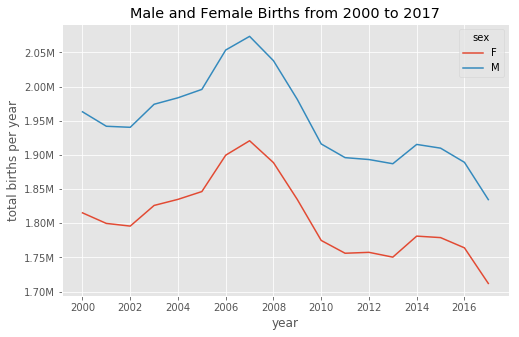

In [6]:
# Plot total births per year for male and female babies
ax = total_births.plot(title='Male and Female Births from 2000 to 2017',
                       xticks=range(2000, 2018, 2), figsize=(8,5))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.2fM' % (x*1e-6)))
plt.ylabel('total births per year')
plt.show()

In [7]:
# Get top 5 births in each year
def get_top5(group):
    return group.sort_values(by='births', ascending=False)[:5]

top_5 = df_baby.groupby(['year', 'sex'], as_index=False).apply(get_top5)

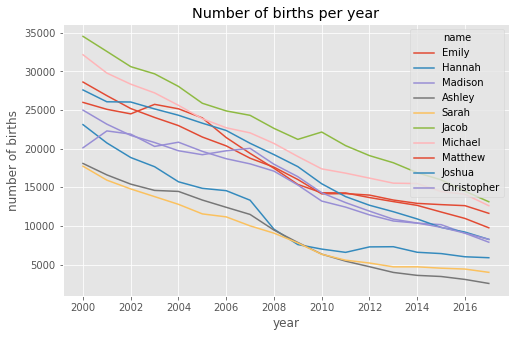

In [8]:
# Let's see how the top 5 names in 2000 evolved over the years
top_5_2000 = top_5[top_5['year'] == 2000]
top_2000_names = [x for x in top_5_2000['name']]

total_births = df_baby.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=np.sum)

subset = total_births[top_2000_names]

# Plot year 2000 popular birth name evolution
subset.plot(figsize=(8, 5), title="Number of births per year", xticks=range(2000, 2018, 2))
plt.ylabel('number of births')
plt.show()

In [14]:
# Add proportion prop that shows fraction of names relative to the total number of births
def add_proportion(group):
    group['proportion'] = group.births / group.births.sum()
    return group

df_baby =  df_baby.groupby(['year', 'sex']).apply(add_proportion)
top_100 = df_baby.groupby(['year', 'sex'], as_index=False).apply(lambda x: x.sort_values(by='births', ascending=False)[:100])

In [18]:
prop_table = top_100.pivot_table('proportion', index='year',
                            columns='sex', aggfunc=sum)

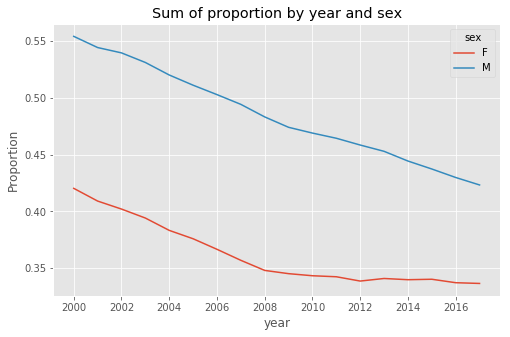

In [19]:
prop_table.plot(title='Sum of proportion by year and sex',
                xticks=range(2000, 2018, 2), figsize=(8,5))
plt.ylabel('Proportion')
plt.show()

In [12]:
# Quantile function to see how many of the popular names it takes to reach 50%
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='proportion', ascending=False)
    return group.proportion.cumsum().values.searchsorted(q) + 1

# Get diversity table
diversity = df_baby.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

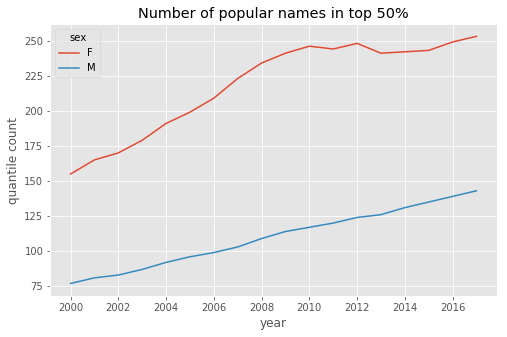

In [13]:
diversity.plot(title="Number of popular names in top 50%",
               xticks=range(2000, 2018, 2), figsize=(8,5))
plt.ylabel('quantile count')
plt.show()